In [1]:
import sqlite3
import pandas as pd

# Connect to (or create) SQLite database
conn = sqlite3.connect("microbiome_db.sqlite")

# Create "patients" table
conn.execute('''
CREATE TABLE patients (
    patient_id INTEGER PRIMARY KEY AUTOINCREMENT, 
    patient_name TEXT, 
    age INTEGER, 
    city TEXT
);
''')

# Insert patient data
conn.executemany('''
INSERT INTO patients (patient_name, age, city) VALUES (?, ?, ?);
''', [
    ('Alice Smith', 32, 'Seattle'),
    ('Bob Johnson', 28, 'Boston'),
    ('Carol Williams', 35, 'San Francisco'),
    ('David Miller', 40, 'Chicago')
])

# Create "samples" table
conn.execute('''
CREATE TABLE samples (
    sample_id INTEGER PRIMARY KEY AUTOINCREMENT, 
    collection_date TEXT, 
    status TEXT, 
    patient_id INTEGER, 
    FOREIGN KEY(patient_id) REFERENCES patients(patient_id)
);
''')

# Insert sample data
conn.executemany('''
INSERT INTO samples (collection_date, status, patient_id) VALUES (?, ?, ?);
''', [
    ('2025-03-18', 'processed', 1),
    ('2025-03-19', 'pending', 2),
    ('2025-03-20', 'processed', 3),
    ('2025-03-21', 'processed', 4),
    ('2025-03-22', 'pending', 1)
])

conn.commit()

print("SQLite database recreated and populated successfully!")


SQLite database recreated and populated successfully!


In [2]:
query = '''
SELECT status, COUNT(*) AS count
FROM samples
GROUP BY status;
'''

status_df = pd.read_sql_query(query, conn)
print(status_df)


      status  count
0    pending      2
1  processed      3


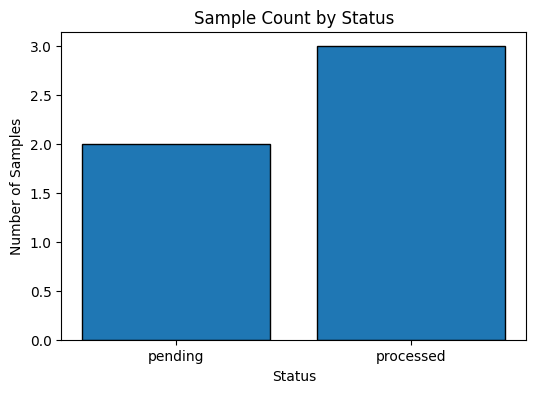

In [3]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(6,4))
plt.bar(status_df['status'], status_df['count'], edgecolor='black')

# Add labels and title
plt.title('Sample Count by Status')
plt.xlabel('Status')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()


In [5]:
query = '''
SELECT samples.status, AVG(patients.age) AS avg_age
FROM samples
JOIN patients ON samples.patient_id = patients.patient_id
GROUP BY samples.status;
'''

age_df = pd.read_sql_query(query, conn).round(2)
print(age_df)


      status  avg_age
0    pending    30.00
1  processed    35.67


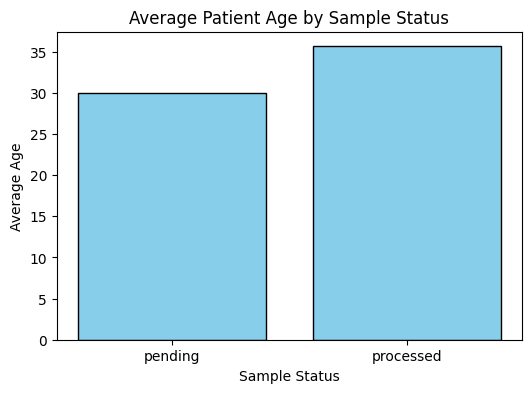

In [6]:
plt.figure(figsize=(6,4))
plt.bar(age_df['status'], age_df['avg_age'], color='skyblue', edgecolor='black')

plt.title('Average Patient Age by Sample Status')
plt.xlabel('Sample Status')
plt.ylabel('Average Age')

plt.show()


In [7]:
query = '''
SELECT collection_date, COUNT(*) AS num_samples
FROM samples
GROUP BY collection_date
ORDER BY collection_date;
'''

timeline_df = pd.read_sql_query(query, conn)
print(timeline_df)


  collection_date  num_samples
0      2025-03-18            1
1      2025-03-19            1
2      2025-03-20            1
3      2025-03-21            1
4      2025-03-22            1
